# Logistic Regression
## Created by Ramses Alexander Coraspe Valdez
### Created on October 9, 2019

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics

## a. Perform a descriptive analysis of the variables/factors, including numerical and graphical analysis that you consider appropriate.

In [45]:
missing = ["?"]
df1 = pd.read_csv('https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Logistic%20Regression/breast-cancer-wisconsin.data',                  
                  sep=',', 
                  names=["id", "Clump_Thickness", "Uniformity_CellSize", "Uniformity_CellShape", 'Marginal_Adhesion', 'Single_Epithelial_CellSize', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'], 
                  na_values = missing);
df1.head(13)                  

,id,Clump_Thickness,Uniformity_CellSize,Uniformity_CellShape,Marginal_Adhesion,Single_Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [46]:
df1.isnull().sum()

id                             0
Clump_Thickness                0
Uniformity_CellSize            0
Uniformity_CellShape           0
Marginal_Adhesion              0
Single_Epithelial_CellSize     0
Bare_Nuclei                   16
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [47]:
mdn = df1['Bare_Nuclei'].median()
df1['Bare_Nuclei'].fillna(mdn, inplace=True)
df1.isnull().sum()

id                            0
Clump_Thickness               0
Uniformity_CellSize           0
Uniformity_CellShape          0
Marginal_Adhesion             0
Single_Epithelial_CellSize    0
Bare_Nuclei                   0
Bland_Chromatin               0
Normal_Nucleoli               0
Mitoses                       0
Class                         0
dtype: int64

In [0]:
df1.drop(['id'], axis = 1, inplace = True)
#df1.drop(df1.columns[[0]], axis = 1, inplace = True) 
benign = df1[df1['Class']==2]
malignant = df1[df1['Class']==4]

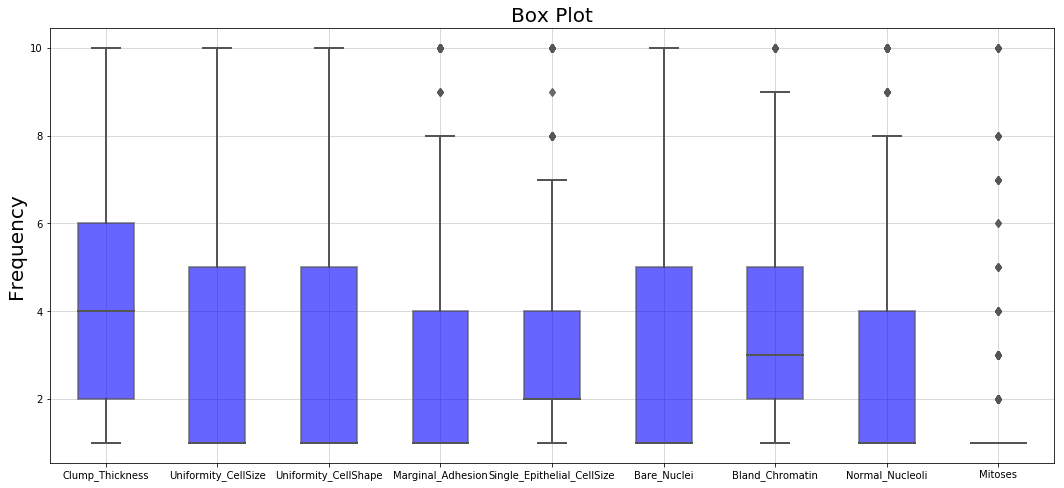

In [49]:
plt.figure(1, figsize=(18, 8));
bp = plt.boxplot([df1.Clump_Thickness, df1.Uniformity_CellSize, df1.Uniformity_CellShape, df1.Marginal_Adhesion, df1.Single_Epithelial_CellSize, df1.Bare_Nuclei, df1.Bland_Chromatin, df1.Normal_Nucleoli, df1.Mitoses], vert=True, patch_artist=True,
              flierprops={'alpha':0.6, 'markersize': 6,
                   'markeredgecolor': '#555555','marker': 'd',
                   'markerfacecolor': "#555555"}, 
              capprops={'color': '#555555', 'linewidth': 2},
              boxprops={'color': '#555555', 'linewidth': 2},
              whiskerprops={'color': '#555555', 'linewidth': 2},
              medianprops={'color': '#555555', 'linewidth': 2},
              meanprops={'color': '#555555', 'linewidth': 2});
plt.grid(True, alpha=0.6);
plt.title("Box Plot", fontsize=20);
plt.ylabel("Frequency", fontsize=20);
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9], labels=["Clump_Thickness", "Uniformity_CellSize", "Uniformity_CellShape", 'Marginal_Adhesion', 'Single_Epithelial_CellSize', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'], fontsize=10);
bp['boxes'][0].set(facecolor='blue', alpha= 0.6);
bp['boxes'][1].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][2].set(facecolor='blue', alpha= 0.6);
bp['boxes'][3].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][4].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][5].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][6].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][7].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][8].set(facecolor="blue",alpha= 0.6 );
plt.show();

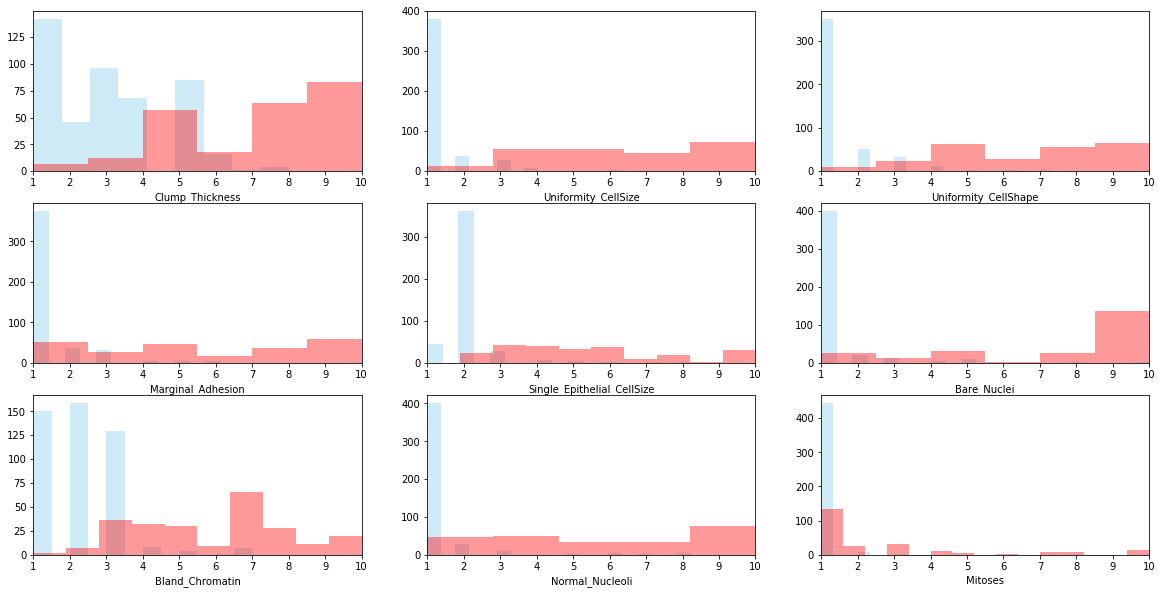

In [50]:
f, axes = plt.subplots(3, 3, figsize=(20, 10))

sns.distplot( benign["Clump_Thickness"] , color="skyblue", ax=axes[0, 0], kde=False)
sns.distplot( malignant["Clump_Thickness"] , color="red", ax=axes[0, 0], kde=False)
axes[0,0].set_xlim([1, 10])
sns.distplot( benign["Uniformity_CellSize"] , color="skyblue", ax=axes[0, 1], kde=False)
sns.distplot( malignant["Uniformity_CellSize"] , color="red", ax=axes[0, 1], kde=False)
axes[0,1].set_xlim([1, 10])
sns.distplot( benign["Uniformity_CellShape"] , color="skyblue", ax=axes[0, 2], kde=False)
sns.distplot( malignant["Uniformity_CellShape"] , color="red", ax=axes[0, 2], kde=False)
axes[0,2].set_xlim([1, 10])
sns.distplot( benign["Marginal_Adhesion"] , color="skyblue", ax=axes[1, 0], kde=False)
sns.distplot( malignant["Marginal_Adhesion"] , color="red", ax=axes[1, 0], kde=False)
axes[1,0].set_xlim([1, 10])
sns.distplot( benign["Single_Epithelial_CellSize"] , color="skyblue", ax=axes[1, 1], kde=False)
sns.distplot( malignant["Single_Epithelial_CellSize"] , color="red", ax=axes[1, 1], kde=False)
axes[1,1].set_xlim([1, 10])
sns.distplot( benign["Bare_Nuclei"] , color="skyblue", ax=axes[1, 2], kde=False)
sns.distplot( malignant["Bare_Nuclei"] , color="red", ax=axes[1, 2], kde=False)
axes[1,2].set_xlim([1, 10])
sns.distplot( benign["Bland_Chromatin"] , color="skyblue", ax=axes[2, 0], kde=False)
sns.distplot( malignant["Bland_Chromatin"] , color="red", ax=axes[2, 0], kde=False)
axes[2,0].set_xlim([1, 10])
sns.distplot( benign["Normal_Nucleoli"] , color="skyblue", ax=axes[2, 1], kde=False)
sns.distplot( malignant["Normal_Nucleoli"] , color="red", ax=axes[2, 1], kde=False)
axes[2,1].set_xlim([1, 10])
sns.distplot( benign["Mitoses"] , color="skyblue", ax=axes[2,2], kde=False)
sns.distplot( malignant["Mitoses"] , color="red", ax=axes[2, 2], kde=False)
axes[2,2].set_xlim([1, 10])
plt.plot();

## b. What variables will be the input variables? Indicate the type of each of these variables: numerical or categorical. In the case of categorical variables, it clearly indicates the treatment of the dummy variables introduced. Would all the independent variables that are in the dataset be used? If not, indicate which or which of them would not be used and why.

1.  "Clump_Thickness" 
2.  "Uniformity_CellSize"
3.  "Uniformity_CellShape" 
4.  "Marginal_Adhesion" 
5.  "Single_Epithelial_CellSize"
6.  "Bare_Nuclei"
7.  "Bland_Chromatin"
8.  "Normal_Nucleoli"
9.  "Mitoses"
10. "Class"

The first nine variables have nominal values and ordinal values were assigned to them too, with the same distance between categories. These variables could be normalized to another range, but in this case they all have the same behavior, apparently they are already scaled. these variables will be the input variables.

The variable "Class" is categorical (binary), and this will be used to identify the class of the record.

So far the only variable in the dataset that was removed is the variable "id" which is only a unique identifier of the record, perhaps other variables can be discarded due to the high correlation but  will be done it later.




## c. Is it necessary to normalize or scalings some of the variables? Justify your decision.

Although all input variables have nominal ordinal values, they will not be normalized, since they are all in the same range of 1 - 10

## d. What is the output variable and how many levels will it have? How much data does the output variable have in each class?

1. "Class" variable will be the output
2. Two levels
3. Class "Bening" represent 65.52%  and the Class "Malignant" represent 34.48%

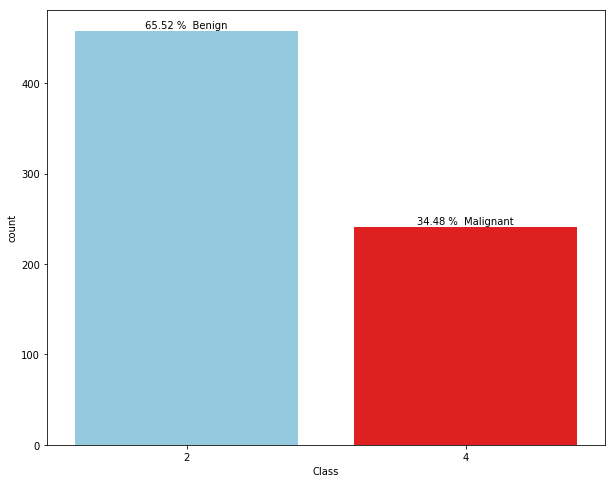

In [51]:
plt.figure(figsize=(10, 8))
ax= sns.countplot(df1['Class'], palette=['skyblue', 'red'])

total = len(df1['Class'])
for p in ax.patches:      
      name = 'Benign'
      if((abs(p.get_x())*10 )- 2 == 4):
         name = 'Malignant' 
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %  {}'.format(round((height/total)*100,2), name ) ,
            ha="center")       
plt.show()

## e. Obtain Pearson's correlation coefficients for each pair of variables and include your conclusions about it.

Checking the correlation matrix below we realize that the variables *Uniformity_CellSize* and *Uniformity_CellShape* are highly correlated and any of them coud be rejected for the analysis, in this case we will not reject any of them to be able to observe if this will affect the final outcomes.



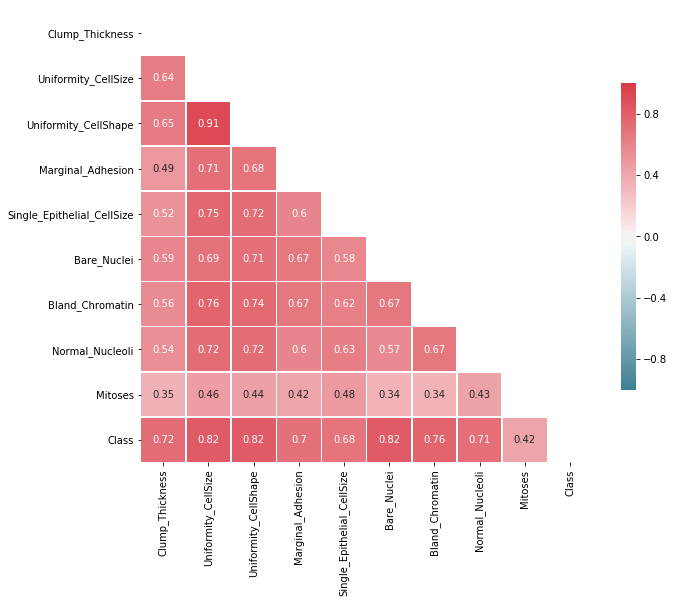

In [52]:
corr = df1.corr(method='pearson').round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

c_map = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=c_map, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

## f. Perform a random partition in the Training set (80%) and Test set (20%). Note that you must select the samples by stratified sampling to respect the proportion of classes M and B.

In [0]:
df1.Class = [1 if each == 4 else 0 for each in df1.Class] 
y = df1.Class
X = df1.drop(['Class'], axis = 1) 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


## g. Find the logistic regression model with the training data, including the p-values of each coefficient, and the AIC metric.

In [54]:
lg = linear_model.LogisticRegression(random_state = 40, max_iter = 100,solver='lbfgs') 
print("Train accuracy: {} ".format(lg.fit(x_train, y_train).score(x_train, y_train)))

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Train accuracy: 0.9749552772808586 
Optimization terminated successfully.
         Current function value: 0.385080
         Iterations 8
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.402     
Dependent Variable:    Class               AIC:                 556.3415  
Date:                  2019-10-11 14:29    BIC:                 597.2883  
No. Observations:      699                 Log-Likelihood:      -269.17   
Df Model:              8                   LL-Null:             -450.26   
Df Residuals:          690                 LLR p-value:         2.2651e-73
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------

## h. Check the model`s performance with the Test set. Shows the confusion matrix and the threshold value used.

Test accuracy: 0.9357142857142857 


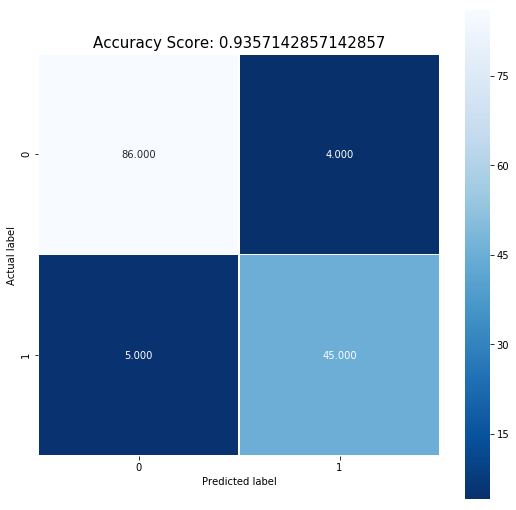

In [55]:
print("Test accuracy: {} ".format(lg.fit(x_train, y_train).score(x_test, y_test))) 

score = lg.score(x_test, y_test)
predictions = lg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


## i. Make the adjustments that you consider appropriate in the process to improve the model obtained, Indicating the adjustments made and if it was possible to improve it.

Removing the *Uniformity_CellShape* variable which is highly correlated and with a p-value greater than 0.05  does not improve the model.


Train accuracy: 0.9767441860465116 
Optimization terminated successfully.
         Current function value: 0.387342
         Iterations 8
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.399     
Dependent Variable:    Class               AIC:                 557.5045  
Date:                  2019-10-11 14:29    BIC:                 593.9017  
No. Observations:      699                 Log-Likelihood:      -270.75   
Df Model:              7                   LL-Null:             -450.26   
Df Residuals:          691                 LLR p-value:         1.4417e-73
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------

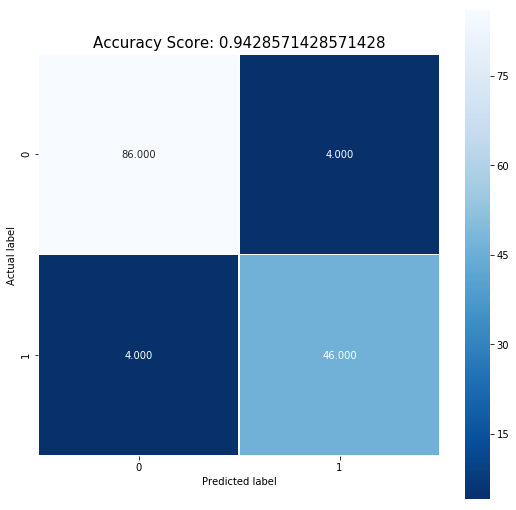

In [56]:
y = df1.Class
X = df1.drop(['Uniformity_CellShape', 'Class'], axis = 1)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

lg = linear_model.LogisticRegression(random_state = 40, max_iter = 100, solver='lbfgs') 
print("Train accuracy: {} ".format(lg.fit(x_train, y_train).score(x_train, y_train)))

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

print("Test accuracy: {} ".format(lg.fit(x_train, y_train).score(x_test, y_test))) 

score = lg.score(x_test, y_test)
predictions = lg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## j. Repeat the process from item (f), but instead of performing the partition indicated in that item, use the cross-validation method with the partition value you consider appropriate.



In [57]:
y = df1.Class
X = df1.drop(['Class'], axis = 1) 
kf =   KFold(n_splits=6)
lg = linear_model.LogisticRegression(random_state = 40, max_iter = 100, solver='lbfgs') 

print(cross_val_score(lg, X, y, cv=kf, scoring='accuracy').mean())


0.9643260634639944


## k. Compare the results of both processes and include your conclusions.

Using 6 splits with the cross_validation method the accuracy improved by almost 0.02%

